# Spending on Education and Corrections vs Crime Level

### Hypothesis

The amount spent on education and corrections is a predictor for the number of crimes committed

In [1]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from functools import reduce

# Assemble Data

In [2]:
# load corrections data
corrections_path = os.path.join('data', 'corrections', 'corrections_all.csv')
corrections_df = pd.read_csv(corrections_path)
corrections_df.set_index('State', inplace=True)
corrections_df.rename(columns={'Total':'Corrections'}, inplace=True)
corrections_df.head()

,Corrections,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
State,,,,,,,,,,,,,,,,,,,,,
2000,35129203000,278856000,173624000,719690000,275158000,4244680000,689090000,555449000,228076000,2218703000,...,62831000,449107000,2766911000,245401000,66127000,1123734000,731277000,156190000,837496000,73469000
2001,38164541000,303759000,172610000,760323000,290520000,5313697000,704421000,604890000,247987000,2248117000,...,66745000,491727000,3074359000,265689000,71988000,1247296000,730116000,122009000,932819000,80018000
2002,38887742000,331476000,173844000,733455000,284600000,5596427000,734457000,637897000,245203000,2199630000,...,69673000,529747000,3157124000,267607000,79771000,1243090000,735214000,170305000,965801000,83268000
2003,39187839000,356928000,182046000,731041000,305803000,5690346000,723572000,615670000,206085000,2141271000,...,79858000,558669000,3201068000,261283000,81767000,1194241000,786781000,182064000,906725000,89551000
2004,39313812000,397943000,176642000,790485000,351786000,5875717000,701710000,558043000,202782000,2185039000,...,61675000,596095000,2972593000,275912000,93827000,1215898000,796810000,182906000,918706000,91003000


In [3]:
# load crime data
# crime_path = os.path.join('data', 'crime', 'crime_rate_per_100_all.csv')
crime_path = os.path.join('data', 'crime', 'crime_all.csv')
crime_df = pd.read_csv(crime_path)
crime_df = crime_df.drop(crime_df.index[11])
crime_df.set_index('State', inplace=True)
crime_df['Crime'] = crime_df.sum(axis=1)
crime_df

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,FLORIDA,GEORGIA,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Crime
State,,,,,,,,,,,,,,,,,,,,,
2000,202159,26641,299092,110019,1266714,171304,110091,35090,910154,388949,...,278218,1033311,99958,18185,214348,300932,47067,172124,16285,11564125
2001,192835,26895,322549,111296,1346557,186379,106791,32267,913230,389543,...,295770,1098809,96307,16978,228445,308492,46120,179410,17392,11804921
2002,200331,27745,348467,112672,1384872,195936,103719,31803,905957,385830,...,290961,1130292,103129,15600,229039,309931,45320,176987,17858,11831419
2003,201572,28130,342973,111141,1420637,195046,101537,33046,881976,408923,...,296010,1138623,105207,14303,220106,312820,47375,169842,17962,11775044
2004,201664,26331,335699,124201,1425264,197527,102078,30992,850895,416873,...,295147,1132256,103246,15039,220227,322167,50421,158258,18052,11660778
2005,197071,28169,317823,127434,1390709,206947,99429,31577,838955,419259,...,299839,1111384,101158,14956,221044,329406,52653,160646,17242,11522689
2006,200578,28765,316286,127027,1350137,182670,97605,34988,849879,408289,...,295204,1080838,95393,15231,210974,308653,52759,172354,16584,11365478
2007,204530,27617,310394,127068,1299685,163047,93017,35103,878227,419417,...,298104,1107196,98804,15202,211007,282275,50740,175255,16235,11214590
2008,211454,24598,307979,123882,1265920,157671,96514,37444,885199,435319,...,296142,1093134,97943,16615,215516,267839,51575,170548,15710,11111207


In [4]:
# load education data
education_path = os.path.join('data', 'education', 'actualls_all.csv')
education_df = pd.read_csv(education_path)
education_df = education_df.drop(education_df.index[[0,1,2]])
education_df = education_df.reset_index(drop=True)
education_df.rename(columns={'Total':'Education'}, inplace=True)
education_df['State'] = education_df['State'].apply(pd.to_numeric)
education_df.set_index('State', inplace=True)
education_df.head()

,Education,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
State,,,,,,,,,,,,,,,,,,,,,
2000,3.107050e+10,557767814,177881580,667976456,328403457,3792096590,370882855,288895735,85735787,1590311741,...,133366735,583465744,2484215057,255609306,91491401,641092965,569577741,257981746,530100703,86526320
2001,7.125435e+10,1205096441,227988480,1990909460,618218324,7895473833,1061188114,703315579,187754734,3622745422,...,296723889,1326565262,4760220857,510599570,253879970,1564714192,1253035444,520774265,1205201789,152676575
2002,8.240055e+10,1387975241,260180178,2520137525,733650835,9092121808,1238777106,825970250,216149404,4124966740,...,342344861,1514613174,5638643478,594855398,276976033,1772711389,1501299011,593509323,1357291868,182179355
2003,9.260448e+10,1584581070,280079667,3103945066,829601733,9928105199,1416997560,908683240,226632147,4631097940,...,373160375,1705965593,6541541039,674510076,304548823,1952288975,1663743593,677382817,1511374487,211058170
2004,1.014980e+11,1672101861,299103691,4312713049,888970231,10825485264,1665593582,965299387,286492122,5181788479,...,375611344,1895812898,7207764023,762450195,318894589,2122509463,1780464671,714586624,1613726426,258093648


In [5]:
dfs = [education_df, corrections_df, crime_df]
df = reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True), dfs)
df = df[['Education', 'Corrections','Crime']]
df

,Education,Corrections,Crime
State,,,
2000,3.107050e+10,35129203000,11564125
2001,7.125435e+10,38164541000,11804921
2002,8.240055e+10,38887742000,11831419
2003,9.260448e+10,39187839000,11775044
2004,1.014980e+11,39313812000,11660778
2005,1.055320e+11,40689366000,11522689
2006,1.074350e+11,42720103000,11365478
2007,1.151780e+11,46497875000,11214590
2008,1.252050e+11,49897531000,11111207


In [6]:
# Assign the data to X and y
X = df[['Education','Corrections']]
y = df['Crime'].values.reshape(11,1)

print(X.shape, y.shape)

(11, 2) (11, 1)


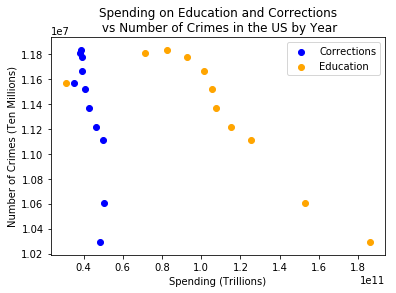

In [7]:
# Plot corrections and crime rate and check for linear data
plt.scatter(X['Corrections'], y, c="blue", label="Corrections")
plt.scatter(X['Education'], y, c="orange", label="Education")
plt.xlabel('Spending (Trillions)')
plt.ylabel('Number of Crimes (Ten Millions)')
plt.title("Spending on Education and Corrections\n vs Number of Crimes in the US by Year")
plt.legend()
plt.savefig("regression_results/actual_edu_correct_vs_crime.png")

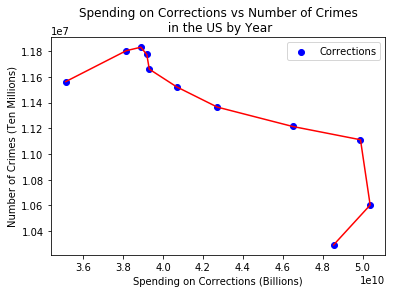

In [8]:
plt.scatter(X['Corrections'], y, c="blue", label="Corrections")
plt.plot(X['Corrections'], y, 'red')
plt.xlabel('Spending on Corrections (Billions)')
plt.ylabel('Number of Crimes (Ten Millions)')
plt.title("Spending on Corrections vs Number of Crimes\n in the US by Year")
plt.legend()
plt.savefig("regression_results/actual_corrections_vs_crime.png")

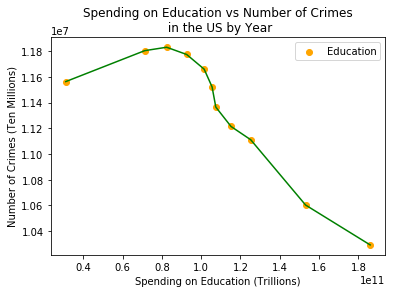

In [9]:
plt.scatter(X['Education'], y, c="orange", label="Education")
plt.plot(X['Education'], y, 'green')
plt.xlabel('Spending on Education (Trillions)')
plt.ylabel('Number of Crimes (Ten Millions)')
plt.title("Spending on Education vs Number of Crimes\n in the US by Year")
plt.legend()
plt.savefig("regression_results/actual_education_vs_crime.png")

# Multiple Linear Regression

In [10]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# Create the model using LinearRegression
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [12]:
# Get linear model
coefficient = model.coef_
y_intercept = model.intercept_
print('Weight coefficients: ', coefficient)
print('y-axis intercept: ', y_intercept) 

Weight coefficients:  [[ -6.03656992e-06  -4.00993939e-05]]
y-axis intercept:  [ 13694514.70586899]


Linear model: y = 13694514.70586899 - 6.03656992e-06 X1 - 4.00993939e-05 X2

In [13]:
# Make predictions
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [11564125]
Predicted output: [ 12098295.72336634]
Prediction Error: [ 534170.72336634]


In [14]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.7736681110966142


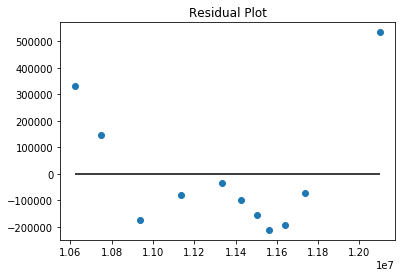

In [15]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")

# Validation

In [16]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
# Fit the model to the training data and calculate the R2 scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9722864719457672
Testing Score: -0.5330949181589593


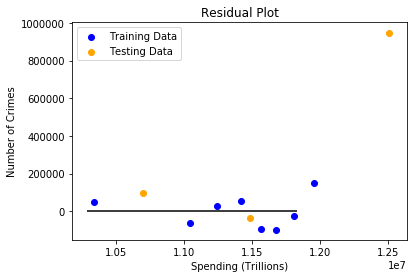

In [19]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.xlabel('Spending (Trillions)')
plt.ylabel('Number of Crimes')
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig("regression_results/residuals_education_vs_crime.png")

In [20]:
y_train.shape

(8, 1)

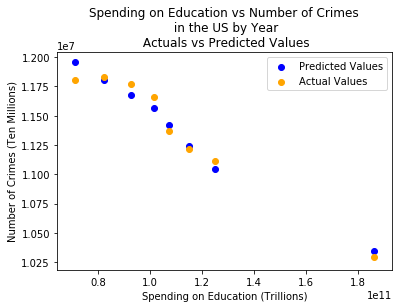

In [21]:
plt.scatter(X_train['Education'], model.predict(X_train), c="blue", label="Predicted Values")
plt.scatter(X_train['Education'], y_train, c="orange", label="Actual Values")
plt.xlabel('Spending on Education (Trillions)')
plt.ylabel('Number of Crimes (Ten Millions)')
plt.title("Spending on Education vs Number of Crimes\n in the US by Year\n Actuals vs Predicted Values")
plt.legend()
plt.savefig("regression_results/predicted_education_vs_crime.png")

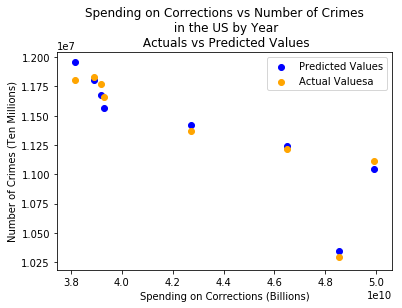

In [22]:
plt.scatter(X_train['Corrections'], model.predict(X_train), c="blue", label="Predicted Values")
plt.scatter(X_train['Corrections'], y_train, c="orange", label="Actual Valuesa")
plt.xlabel('Spending on Corrections (Billions)')
plt.ylabel('Number of Crimes (Ten Millions)')
plt.title("Spending on Corrections vs Number of Crimes\n in the US by Year\n Actuals vs Predicted Values")
plt.legend()
plt.savefig("regression_results/predicted_correction_vs_crime.png")

In [23]:
# Get linear model
coefficient = model.coef_
y_intercept = model.intercept_
print('Weight coefficients: ', coefficient)
print('y-axis intercept: ', y_intercept) 

Weight coefficients:  [[ -1.21059839e-05  -2.19145345e-05]]
y-axis intercept:  [ 13656210.27311025]


Linear model: y =  13656210.2731 - 1.21059839e-05X1 - 2.19145345e-05X2

In [24]:
# Make predictions
predictions = model.predict(X_train)
print(f"True output: {y_train[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y_train[0]}")

True output: [10292375]
Predicted output: [ 10340508.0399909]
Prediction Error: [ 48133.0399909]
